# **FOREST COVER CLASSIFICATION**


### **IMPORT LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report
from xgboost import XGBClassifier,plot_importance

In [ ]:
df=pd.read_csv("/content/forest_dataset.csv.zip")

In [ ]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2683,333,35,30,26,2743,121,173,179,6572,...,0,0,0,0,0,0,0,0,0,2
1,2915,90,8,216,11,4433,232,228,129,4019,...,0,0,0,0,0,0,0,0,0,1
2,2941,162,7,698,76,2783,227,242,148,1784,...,0,0,0,0,0,0,0,0,0,2
3,3096,60,17,170,3,3303,231,202,99,5370,...,0,0,0,0,0,0,0,0,0,1
4,2999,66,8,488,37,1532,228,225,131,2290,...,0,0,0,0,0,0,0,0,0,2
5,2878,7,11,417,47,2355,207,218,148,2571,...,0,0,0,0,0,0,0,0,0,2
6,2995,144,8,324,77,2523,232,239,138,1711,...,1,0,0,0,0,0,0,0,0,2
7,3158,143,28,480,81,1061,247,221,84,2234,...,0,0,0,0,0,0,0,0,0,1
8,2911,315,8,67,4,3522,198,233,175,2407,...,0,0,0,0,0,0,0,0,0,2
9,2968,212,10,42,3,5413,211,250,173,2213,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       10000 non-null  int64
 1   1       10000 non-null  int64
 2   2       10000 non-null  int64
 3   3       10000 non-null  int64
 4   4       10000 non-null  int64
 5   5       10000 non-null  int64
 6   6       10000 non-null  int64
 7   7       10000 non-null  int64
 8   8       10000 non-null  int64
 9   9       10000 non-null  int64
 10  10      10000 non-null  int64
 11  11      10000 non-null  int64
 12  12      10000 non-null  int64
 13  13      10000 non-null  int64
 14  14      10000 non-null  int64
 15  15      10000 non-null  int64
 16  16      10000 non-null  int64
 17  17      10000 non-null  int64
 18  18      10000 non-null  int64
 19  19      10000 non-null  int64
 20  20      10000 non-null  int64
 21  21      10000 non-null  int64
 22  22      10000 non-null  int64
 23  23      1000

In [ ]:
feature_cols = [str(i) for i in range(54)]
df.columns = feature_cols + ['cover_type']

In [ ]:
df.isnull().sum()

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,cover_type
0,2683,333,35,30,26,2743,121,173,179,6572,...,0,0,0,0,0,0,0,0,0,2
1,2915,90,8,216,11,4433,232,228,129,4019,...,0,0,0,0,0,0,0,0,0,1
2,2941,162,7,698,76,2783,227,242,148,1784,...,0,0,0,0,0,0,0,0,0,2
3,3096,60,17,170,3,3303,231,202,99,5370,...,0,0,0,0,0,0,0,0,0,1
4,2999,66,8,488,37,1532,228,225,131,2290,...,0,0,0,0,0,0,0,0,0,2


In [ ]:
X=df.drop('cover_type', axis=1)
y=df['cover_type']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [ ]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

### **RANDOM FOREST**

In [ ]:
rf=RandomForestClassifier(n_estimators=200,random_state=42,class_weight='balanced')
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_test)

In [ ]:
print(accuracy_score(y_test,rf_pred))
print(precision_score(y_test,rf_pred,average='weighted'))
print(classification_report(y_test,rf_pred))

0.7995
0.8017400195662131
              precision    recall  f1-score   support

           1       0.81      0.78      0.79       738
           2       0.80      0.86      0.83       975
           3       0.73      0.83      0.78       118
           4       1.00      0.40      0.57        10
           5       0.86      0.18      0.30        33
           6       0.69      0.45      0.55        60
           7       0.96      0.71      0.82        66

    accuracy                           0.80      2000
   macro avg       0.84      0.60      0.66      2000
weighted avg       0.80      0.80      0.79      2000



Text(95.72222222222221, 0.5, 'Actual Labels')

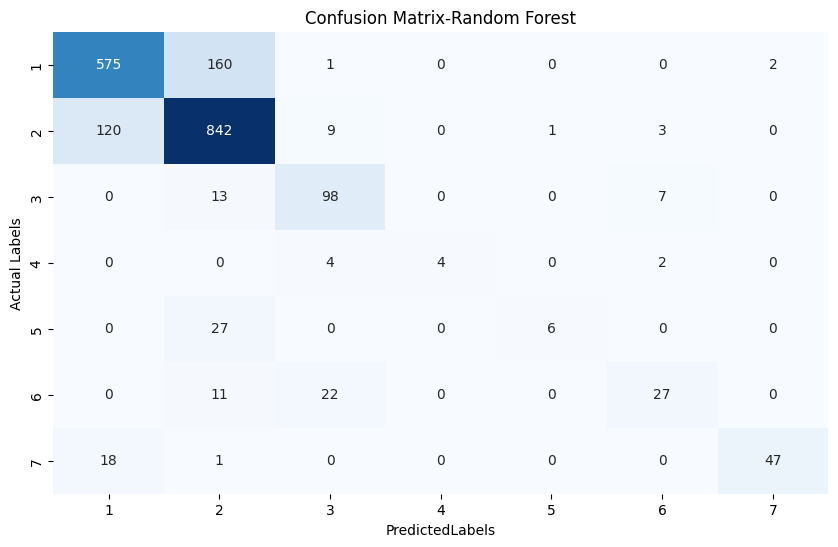

In [ ]:
cm=confusion_matrix(y_test,rf_pred)
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',cbar=False,xticklabels=np.unique(y_test),yticklabels=np.unique(y_test))
plt.title("Confusion Matrix-Random Forest")
plt.xlabel('PredictedLabels')
plt.ylabel('Actual Labels')

### **XGBOOST**

In [ ]:
print(y.value_counts())

cover_type
2    4876
1    3690
3     590
7     329
6     302
5     162
4      51
Name: count, dtype: int64


In [ ]:
# Shift labels to start from 0
y_train_shifted = y_train - 1
y_test_shifted = y_test - 1

In [ ]:
# Identify majority and minority class
majority_class = y_train_shifted.value_counts().idxmax()
minority_class = y_train_shifted.value_counts().idxmin()
print(majority_class,minority_class)

1 3


In [ ]:
scale_pos_weight = len(y_train_shifted[y_train_shifted == majority_class]) / len(y_train_shifted[y_train_shifted == minority_class])

In [ ]:
xgb = XGBClassifier(scale_pos_weight=scale_pos_weight, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train_shifted)
xgb_pred = xgb.predict(X_test)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:16:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.7925
Precision: 0.7922808830084009
              precision    recall  f1-score   support

           0       0.78      0.77      0.78       738
           1       0.80      0.84      0.82       975
           2       0.77      0.82      0.80       118
           3       0.83      0.50      0.62        10
           4       0.75      0.36      0.49        33
           5       0.73      0.60      0.66        60
           6       0.91      0.80      0.85        66

    accuracy                           0.79      2000
   macro avg       0.80      0.67      0.72      2000
weighted avg       0.79      0.79      0.79      2000



Text(95.72222222222221, 0.5, 'Actual Labels')

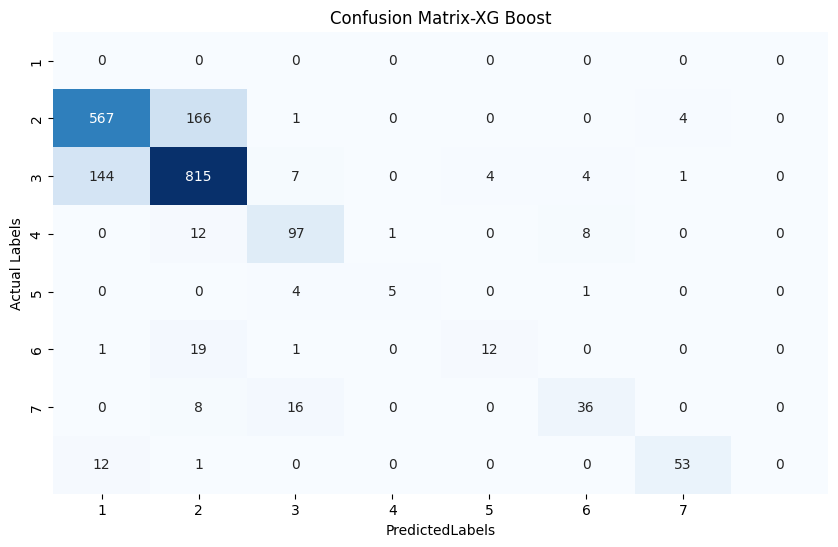

In [ ]:
print("Accuracy:", accuracy_score(y_test_shifted, xgb_pred))
print("Precision:", precision_score(y_test_shifted, xgb_pred, average='weighted'))
print(classification_report(y_test_shifted, xgb_pred))
cm=confusion_matrix(y_test,xgb_pred)
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',cbar=False,xticklabels=np.unique(y_test),yticklabels=np.unique(y_test))
plt.title("Confusion Matrix-XG Boost")
plt.xlabel('PredictedLabels')
plt.ylabel('Actual Labels')

### **FEATURE IMPORTANCE**

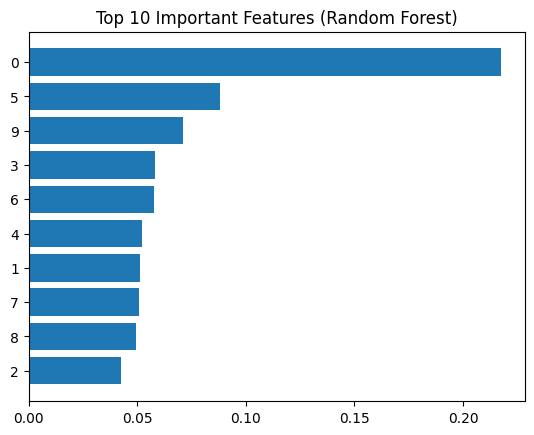

In [ ]:
# Random Forest
importances_rf = rf.feature_importances_
indices_rf = np.argsort(importances_rf)[-10:]

plt.barh(range(len(indices_rf)), importances_rf[indices_rf], align='center')
plt.yticks(range(len(indices_rf)), [X.columns[i] for i in indices_rf])
plt.title("Top 10 Important Features (Random Forest)")
plt.show()

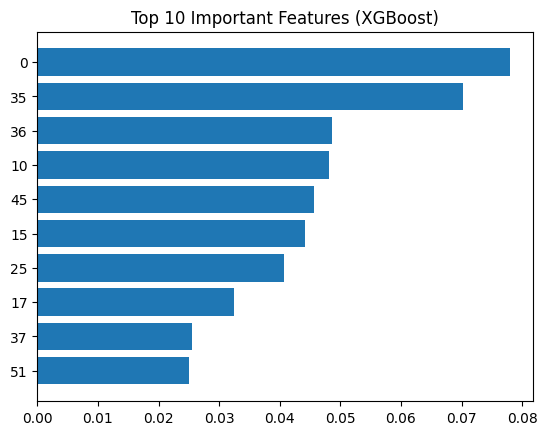

In [ ]:
# XGBoost
importances_xgb = xgb.feature_importances_
indices_xgb = np.argsort(importances_xgb)[-10:]

plt.barh(range(len(indices_xgb)), importances_xgb[indices_xgb], align='center')
plt.yticks(range(len(indices_xgb)), [X.columns[i] for i in indices_xgb])
plt.title("Top 10 Important Features (XGBoost)")
plt.show()

### **PREDICTION**

In [ ]:
# Example new data point (replace with actual values)
# Create a dictionary with 54 keys (0 to 53) and initialize values to 0
new_data_dict = {str(i): 0 for i in range(54)}

# Update the dictionary with the known feature values
new_data_dict.update({
    "0": 2750,  # Elevation
    "1": 135,   # Aspect
    "2": 15,    # Slope
    "3": 250,   # Horizontal_Distance_To_Hydrology
    "4": -10,   # Vertical_Distance_To_Hydrology
    "5": 1200,  # Horizontal_Distance_To_Roadways
    "6": 210,   # Hillshade_9am
    "7": 225,   # Hillshade_Noon
    "8": 205,   # Hillshade_3pm
    "9": 750,   # Horizontal_Distance_To_Fire_Points
    # Assuming wilderness area and soil type features are at indices 10-53 and are all 0 for this example
})

new_data = pd.DataFrame([new_data_dict])

In [ ]:
# Preprocess the new data using the fitted StandardScaler
new_data_scaled = sc.transform(new_data)

# Predict the forest cover type using the trained XGBoost model
# Add 1 to the prediction to convert back to the original class labels (1-7)
prediction = xgb.predict(new_data_scaled)[0] + 1

# Forest Cover Type Class Mapping:
# 1 → Spruce/Fir
# 2 → Lodgepole Pine
# 3 → Ponderosa Pine
# 4 → Cottonwood/Willow
# 5 → Aspen
# 6 → Douglas-fir
# 7 → Krummholz

print("Predicted Forest Cover Type:", prediction)

Predicted Forest Cover Type: 2
